In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
X_train = pd.read_csv("./X_train.csv")
y_train = pd.read_csv("./y_train.csv")
X_test = pd.read_csv('./X_test.csv')

In [5]:
# A look into Data
X_train.head(15)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.748570,2.103000,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.339950,1.506400,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.264290,1.592200,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.426840,1.099300,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.509690,1.468900,-10.4410
5,0_5,0,5,-0.75853,-0.63439,-0.10483,-0.10580,0.059664,0.013043,-0.013231,-0.447450,0.992810,-10.4020
6,0_6,0,6,-0.75853,-0.63441,-0.10481,-0.10569,0.082140,0.044356,-0.002696,-0.141630,0.734970,-9.4296
7,0_7,0,7,-0.75852,-0.63444,-0.10480,-0.10561,0.056218,0.038162,-0.022931,-0.121600,0.075417,-8.6088
8,0_8,0,8,-0.75851,-0.63445,-0.10485,-0.10559,-0.012846,0.039004,-0.007831,1.600000,0.816110,-7.6426
9,0_9,0,9,-0.75851,-0.63443,-0.10489,-0.10567,-0.090082,0.027299,-0.009970,0.474960,0.909600,-8.8120


In [24]:
y_train.head(10)

,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
5,5,1,tiled
6,6,34,soft_pvc
7,7,31,concrete
8,8,33,hard_tiles_large_space
9,9,11,tiled


### y_train.csv - the surfaces for training set.

- series_id: ID number for the measurement series.

- group_id: ID number for all of the measurements taken in a recording session. Provided for the training set only, to enable more cross validation strategies.

- surface: the target.


In [7]:
# Shape
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (487680, 13)
y_train shape: (3810, 3)
X_test shape: (488448, 13)


In [8]:
for i,j in enumerate(np.array(X_train.columns[3:], dtype = str)):
    print(f"Sensor Channel {i} :{j} ")

Sensor Channel 0 :orientation_X 
Sensor Channel 1 :orientation_Y 
Sensor Channel 2 :orientation_Z 
Sensor Channel 3 :orientation_W 
Sensor Channel 4 :angular_velocity_X 
Sensor Channel 5 :angular_velocity_Y 
Sensor Channel 6 :angular_velocity_Z 
Sensor Channel 7 :linear_acceleration_X 
Sensor Channel 8 :linear_acceleration_Y 
Sensor Channel 9 :linear_acceleration_Z 


In [9]:
print(f"No. of Measurements in one series: {len(X_train.measurement_number.value_counts())}")

No. of Measurements in one series: 128


In [10]:
#Number of series
print(f"No. of series {X_train.shape[0]/len(X_train.measurement_number.value_counts())}")

No. of series 3810.0


Which is eqaul to y_train shape

### Basic Stats

In [11]:
X_train.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000,487680.000000
mean,1904.500000,63.500000,-0.018050,0.075062,0.012458,-0.003804,0.000178,0.008338,-0.019184,0.129281,2.886468,-9.364886
std,1099.853353,36.949327,0.685696,0.708226,0.105972,0.104299,0.117764,0.088677,0.229153,1.870600,2.140067,2.845341
min,0.000000,0.000000,-0.989100,-0.989650,-0.162830,-0.156620,-2.371000,-0.927860,-1.268800,-36.067000,-121.490000,-75.386000
25%,952.000000,31.750000,-0.705120,-0.688980,-0.089466,-0.106060,-0.040752,-0.033191,-0.090743,-0.530833,1.957900,-10.193000
50%,1904.500000,63.500000,-0.105960,0.237855,0.031949,-0.018704,0.000084,0.005412,-0.005335,0.124980,2.879600,-9.365300
75%,2857.000000,95.250000,0.651803,0.809550,0.122870,0.097215,0.040527,0.048068,0.064604,0.792263,3.798800,-8.522700
max,3809.000000,127.000000,0.989100,0.988980,0.155710,0.154770,2.282200,1.079100,1.387300,36.797000,73.008000,65.839000


In [12]:
X_test.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000,488448.000000
mean,1907.500000,63.500000,0.031996,0.120651,0.018735,0.004024,0.000401,0.013669,-0.036101,0.125433,2.906588,-9.359811
std,1101.585403,36.949327,0.671977,0.714522,0.108481,0.100957,0.114485,0.089440,0.233791,1.832639,2.094727,2.802670
min,0.000000,0.000000,-0.989720,-0.989810,-0.154680,-0.156270,-2.403300,-1.193000,-1.458200,-35.040000,-107.480000,-83.173000
25%,953.750000,31.750000,-0.648130,-0.744503,-0.112660,-0.098435,-0.037396,-0.029865,-0.089842,-0.486233,2.052100,-10.125000
50%,1907.500000,63.500000,0.132910,0.397860,0.057271,0.022654,0.001107,0.007276,-0.008911,0.112490,2.900300,-9.361700
75%,2861.250000,95.250000,0.575270,0.803600,0.124770,0.083706,0.037827,0.051112,0.057876,0.727250,3.758000,-8.582075
max,3815.000000,127.000000,0.989320,0.988940,0.154250,0.152510,3.396600,1.150700,0.960280,36.628000,55.624000,59.633000


In [13]:
y_train.describe()

,series_id,group_id
count,3810.000000,3810.000000
mean,1904.500000,37.601312
std,1099.996591,20.982743
min,0.000000,0.000000
25%,952.250000,19.000000
50%,1904.500000,39.000000
75%,2856.750000,55.000000
max,3809.000000,72.000000


#### Finding Missing Values in Data

In [14]:
totalt = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/X_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
print ("Missing Data at Training")
missing_data

Missing Data at Training


,Total,Percent
linear_acceleration_Z,0,0.0
linear_acceleration_Y,0,0.0
linear_acceleration_X,0,0.0
angular_velocity_Z,0,0.0
angular_velocity_Y,0,0.0
angular_velocity_X,0,0.0
orientation_W,0,0.0
orientation_Z,0,0.0
orientation_Y,0,0.0
orientation_X,0,0.0


In [15]:
totalt = X_test.isnull().sum().sort_values()
percentage = (X_test.isnull()/X_test.isnull().count())
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
print ("Missing Data at Testing")
missing_data

Missing Data at Testing


,Total,Percent
row_id,0,0.0
series_id,0,0.0
measurement_number,0,0.0
orientation_X,0,0.0
orientation_Y,0,0.0
orientation_Z,0,0.0
orientation_W,0,0.0
angular_velocity_X,0,0.0
angular_velocity_Y,0,0.0
angular_velocity_Z,0,0.0


### Group ID Count

Its significance: Group ID denotes the recording sessions. For example is recording session 1, only the robot is hovered over the tiled surface. This is important to know, because measurement of IMU sensors is greatly affected by factors like battery level, enviornment, etc. To perform a valid cross validation set we need to divide the set in consideration of Group ID. 

In [61]:
y_train[y_train.group_id == 1].head(5)

,series_id,group_id,surface
5,5,1,tiled
11,11,1,tiled
36,36,1,tiled
81,81,1,tiled
120,120,1,tiled


In [62]:
y_train[y_train.group_id == 8].head(5)

,series_id,group_id,surface
18,18,8,tiled
66,66,8,tiled
126,126,8,tiled
127,127,8,tiled
174,174,8,tiled


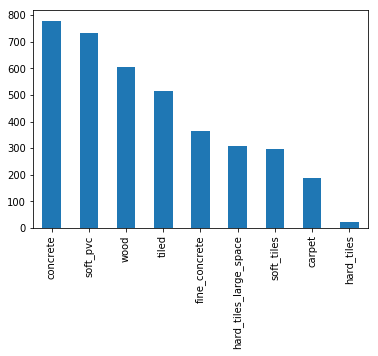

In [16]:
y_train.surface.value_counts().plot(kind='bar')

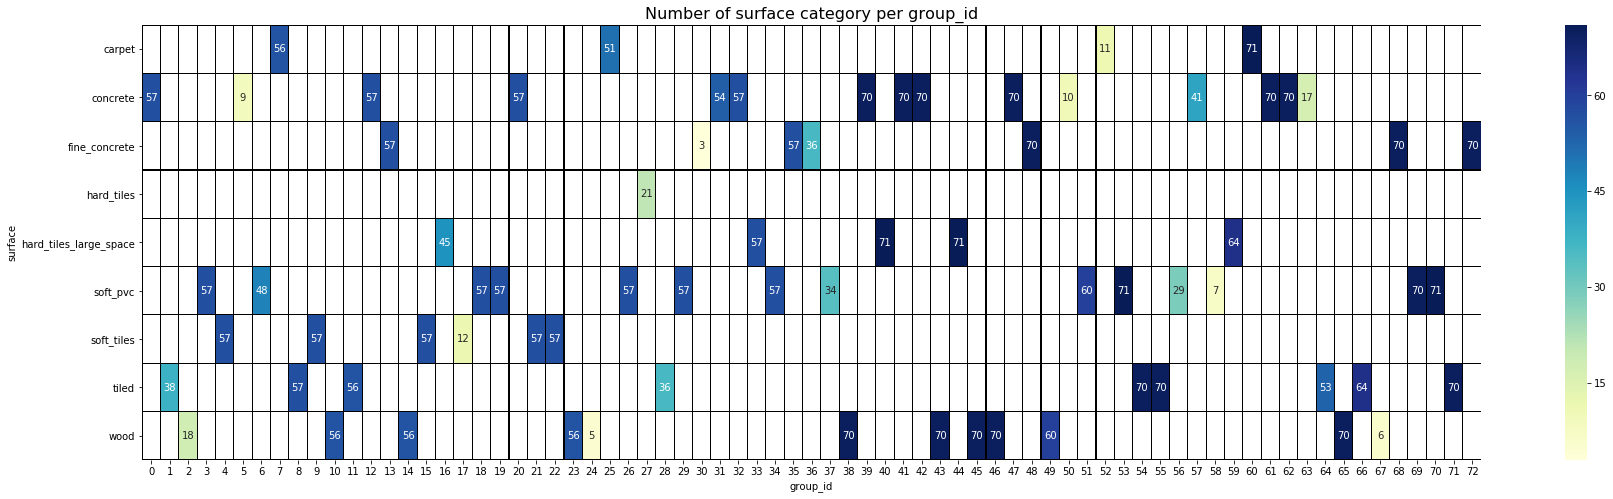

In [57]:
fig, ax = plt.subplots(1,1,figsize=(30,8))
# plt.figure(figsize=(50,50))
tmp = pd.DataFrame(y_train.groupby(['group_id', 'surface'])['series_id'].count().reset_index())
m = tmp.pivot(index='surface', columns='group_id', values='series_id')
s = sns.heatmap(m, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
s.set_title('Number of surface category per group_id', size=16)
plt.show()

### Example: Series 1

In [18]:
Serie1 = X_train.head(128)
display(Serie1.head())
print(f"Label of Serie 1 is {y_train[y_train.series_id == 0].iloc[0,2]}")

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003385,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


Label of Serie 1 is fine_concrete


In [19]:
Serie1.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.0,63.500000,-0.758666,-0.634008,-0.105474,-0.106470,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391
std,0.0,37.094474,0.000363,0.000471,0.000432,0.000389,0.052800,0.031544,0.017127,0.911175,1.387790,1.095040
min,0.0,0.000000,-0.759530,-0.634560,-0.106140,-0.107050,-0.160410,-0.079404,-0.030181,-1.864400,0.075417,-12.512000
25%,0.0,31.750000,-0.758927,-0.634383,-0.105873,-0.106775,-0.029069,-0.027110,-0.005289,-0.362872,1.791050,-9.875850
50%,0.0,63.500000,-0.758530,-0.634270,-0.105500,-0.106555,-0.005082,-0.004037,0.006842,0.231665,3.407550,-9.429950
75%,0.0,95.250000,-0.758367,-0.633530,-0.105077,-0.106130,0.035803,0.020031,0.020088,0.905635,4.119200,-8.633425
max,0.0,127.000000,-0.758220,-0.633060,-0.104610,-0.105590,0.107650,0.072698,0.051720,2.853800,5.386400,-6.268100


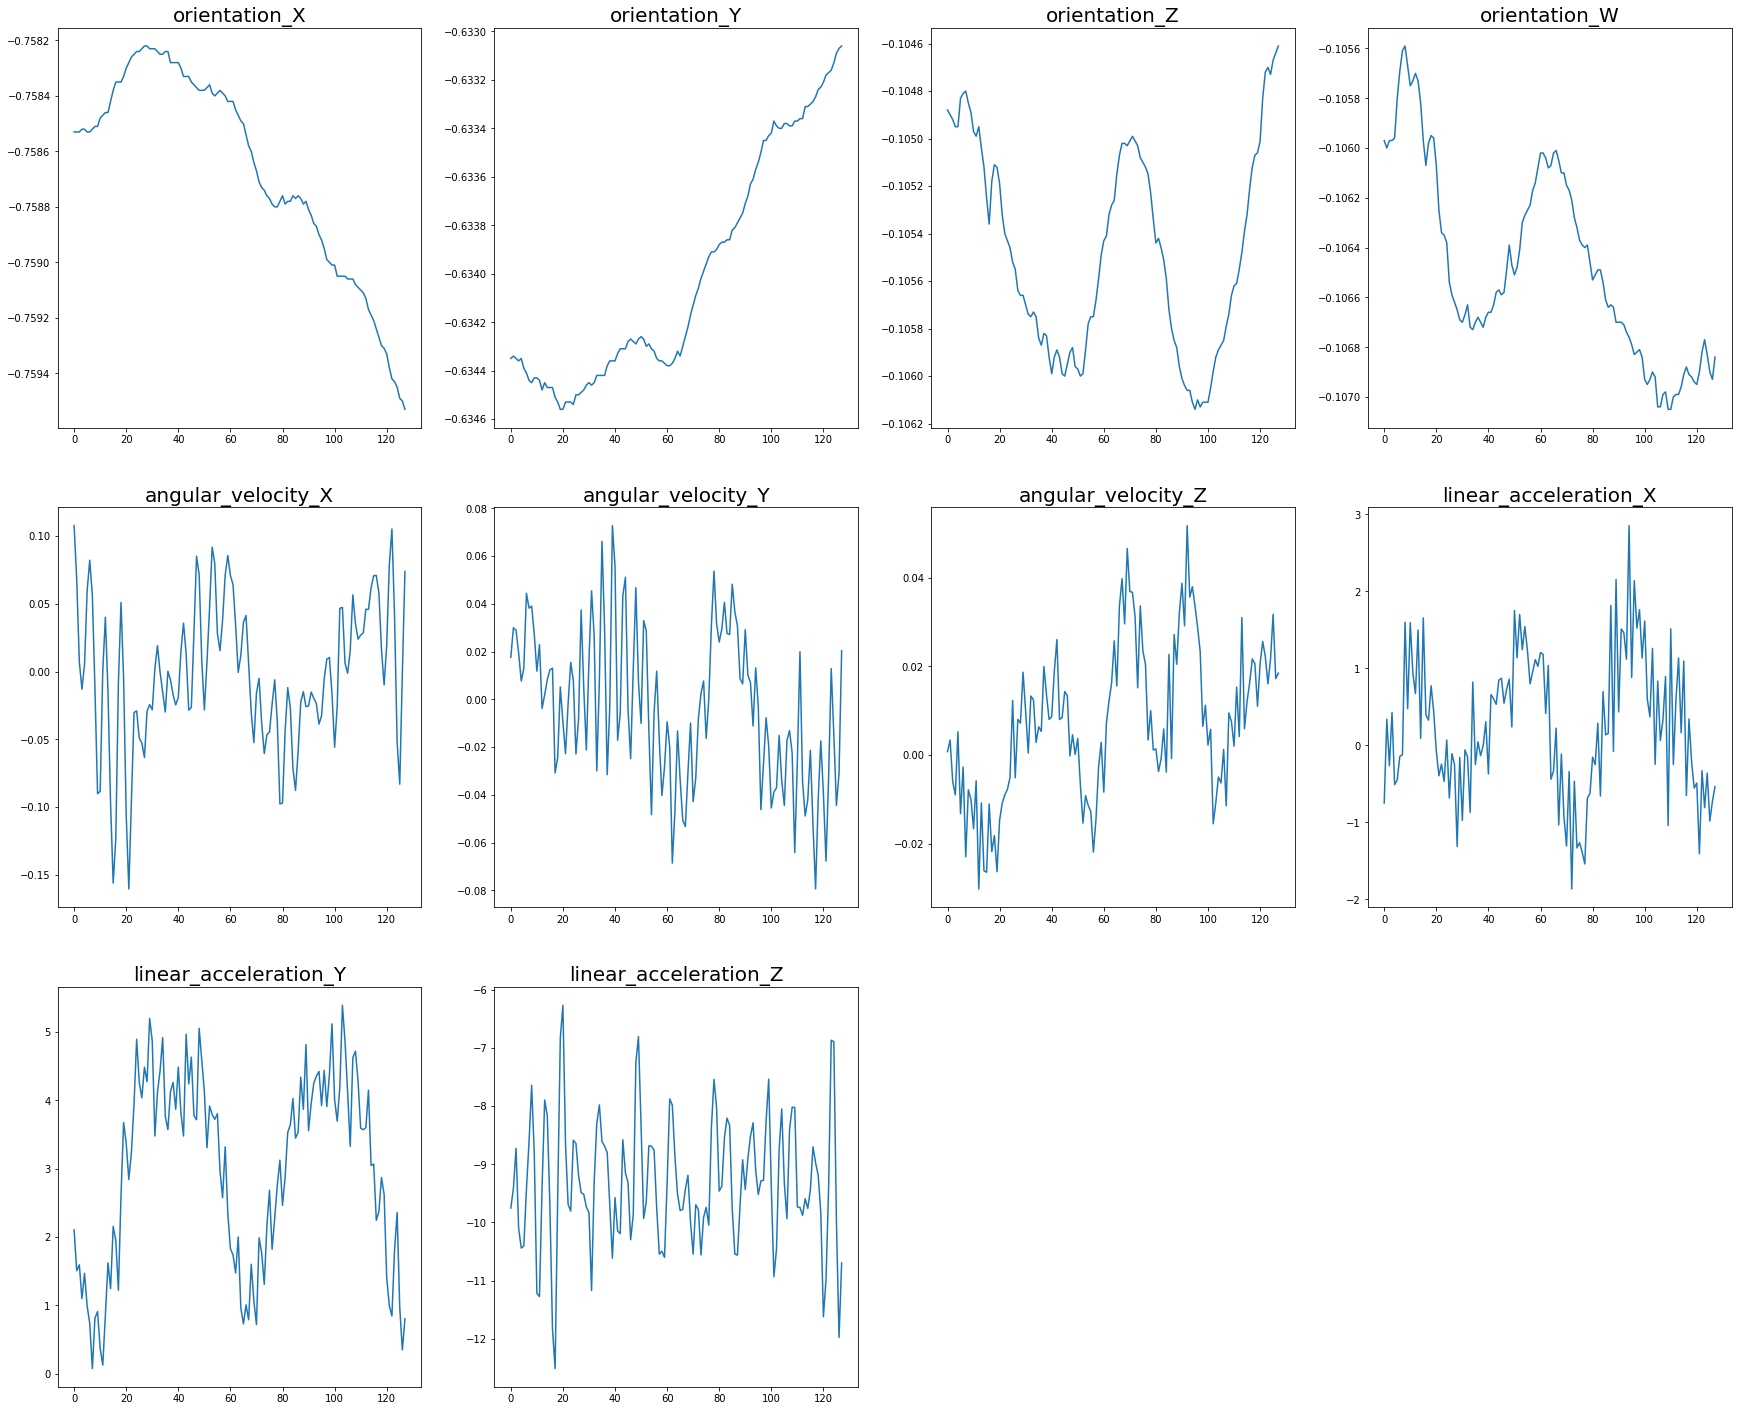

In [20]:
plt.figure(figsize=(30,25))
for i, col in enumerate(Serie1.columns[3:]):
    plt.subplot(3,4,i+1)
    plt.plot(Serie1[col])
    plt.title(col, fontdict={'fontsize':20,})

In [21]:
def plot_series(series_id):
    plt.figure(figsize=(30,25))
    print(y_train[y_train['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(X_train[X_train.series_id == series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3,4,i+1)
        plt.plot(X_train[X_train.series_id == series_id][col], color = color)
        plt.title(col, fontdict={'fontsize':20,})

Concrete


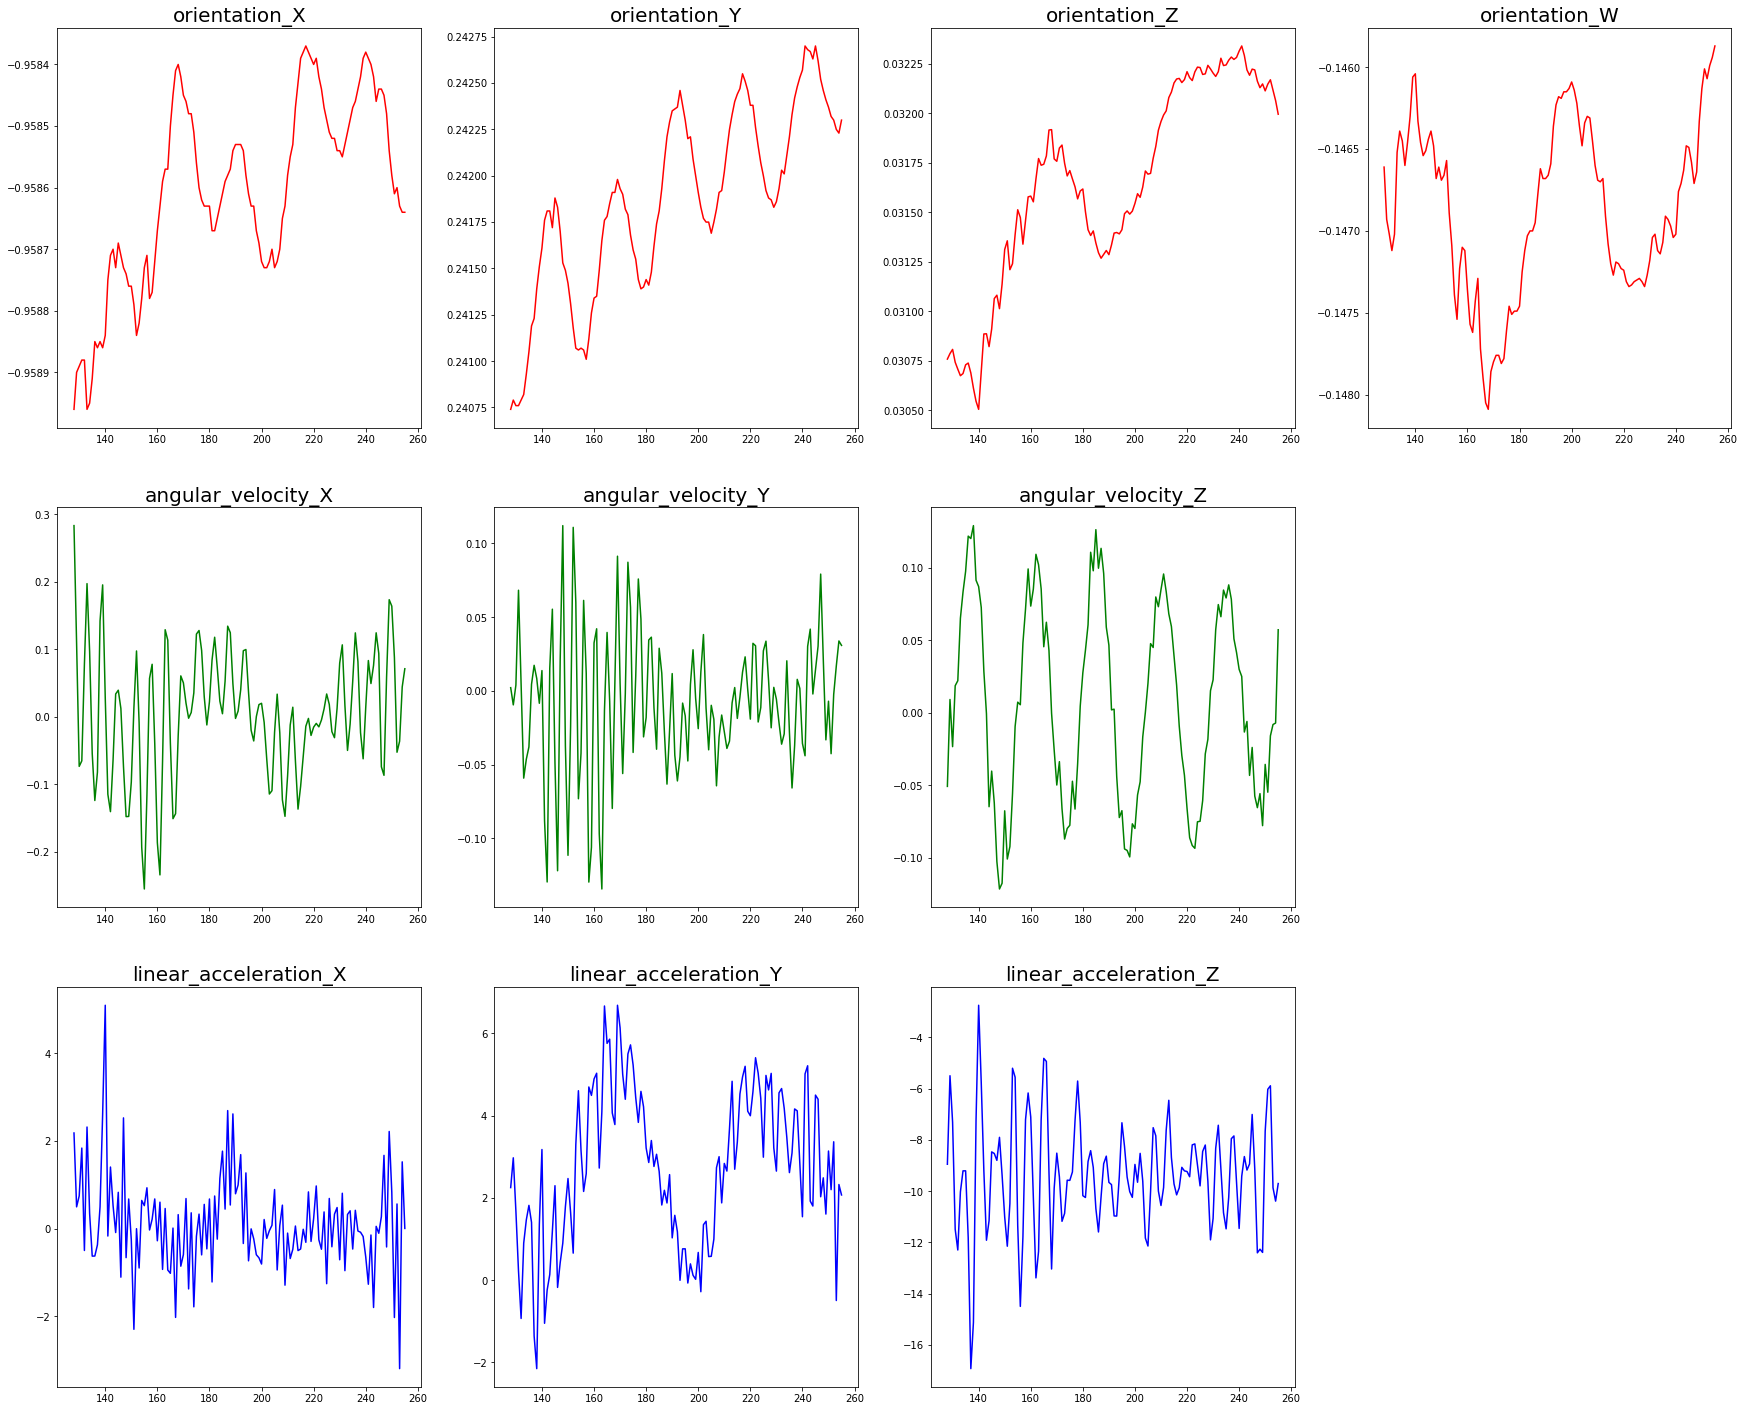

In [22]:
plot_series(1)

Tiled


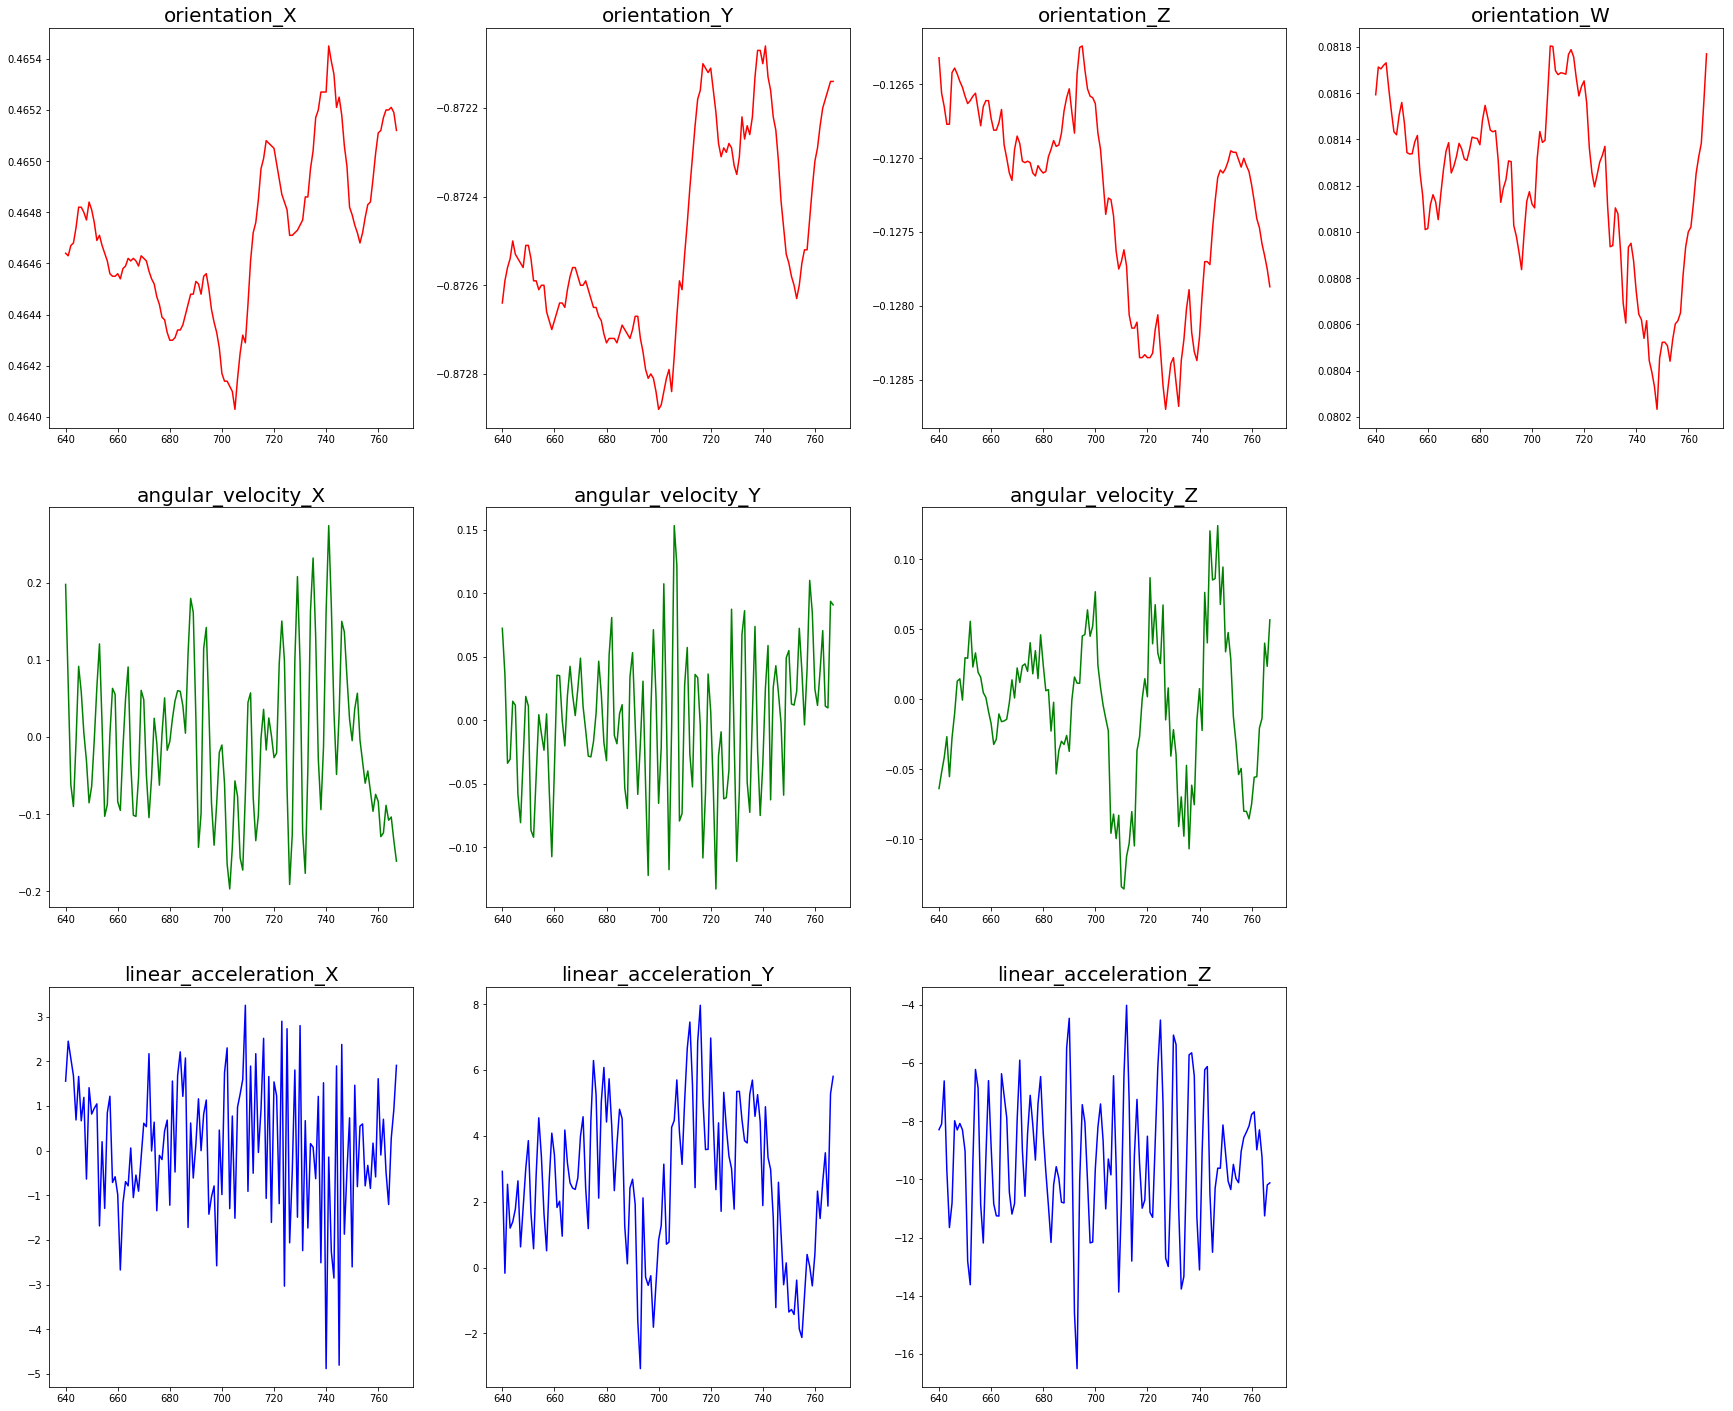

In [23]:
plot_series(5)

### Correlations